# 1. Importing necessary libraries

I will code this whole notebook without using any special machine learning libraries to give some insight on what exactly is going on inside the model (here its Logistic Regression). \
I'm only using **numpy** for math, **pandas** for data analysis,**sns, plotly** and **matplotlib** for stats and ploting the graphs and **pickle** to save the model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import pickle
import seaborn as sns
import plotly.express as px
import pprint

# 2. Importing Data and Initial analysis

I've taken the clean version of the 'Titanic' dataset.

In [2]:
df = pd.read_csv(f"../input/titanic/train_and_test2.csv")

Let's check the dataset.

In [3]:
df.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


It seems that there are some irrelevant columns and also the 'Survived' columns is mispelled. This dataset doesn't have the ticket and cabin columns which were quite unnecessary for the analysis.

In [4]:
#Let's check the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   zero         1309 non-null   int64  
 6   zero.1       1309 non-null   int64  
 7   zero.2       1309 non-null   int64  
 8   zero.3       1309 non-null   int64  
 9   zero.4       1309 non-null   int64  
 10  zero.5       1309 non-null   int64  
 11  zero.6       1309 non-null   int64  
 12  Parch        1309 non-null   int64  
 13  zero.7       1309 non-null   int64  
 14  zero.8       1309 non-null   int64  
 15  zero.9       1309 non-null   int64  
 16  zero.10      1309 non-null   int64  
 17  zero.11      1309 non-null   int64  
 18  zero.12      1309 non-null   int64  
 19  zero.1

# 3. Data preprocessing and Visualization 

It seems other than Age, Fare, Sex, Pclass, 2urvived(We'll update this name) columns all other columns are irrelevant. So we'll only select these columns.

In [5]:
df = df[["Age", "Fare", "Sex", "sibsp", "Parch", "Pclass", "Embarked", "2urvived"]]

In [6]:
#Renaming the 2urvived to survived
df.rename(columns={'2urvived':'Survived'},inplace=True) 

Let's also remove the rows which have null values.

In [7]:
df.dropna(inplace=True)

Let's see the GRAPHS!

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

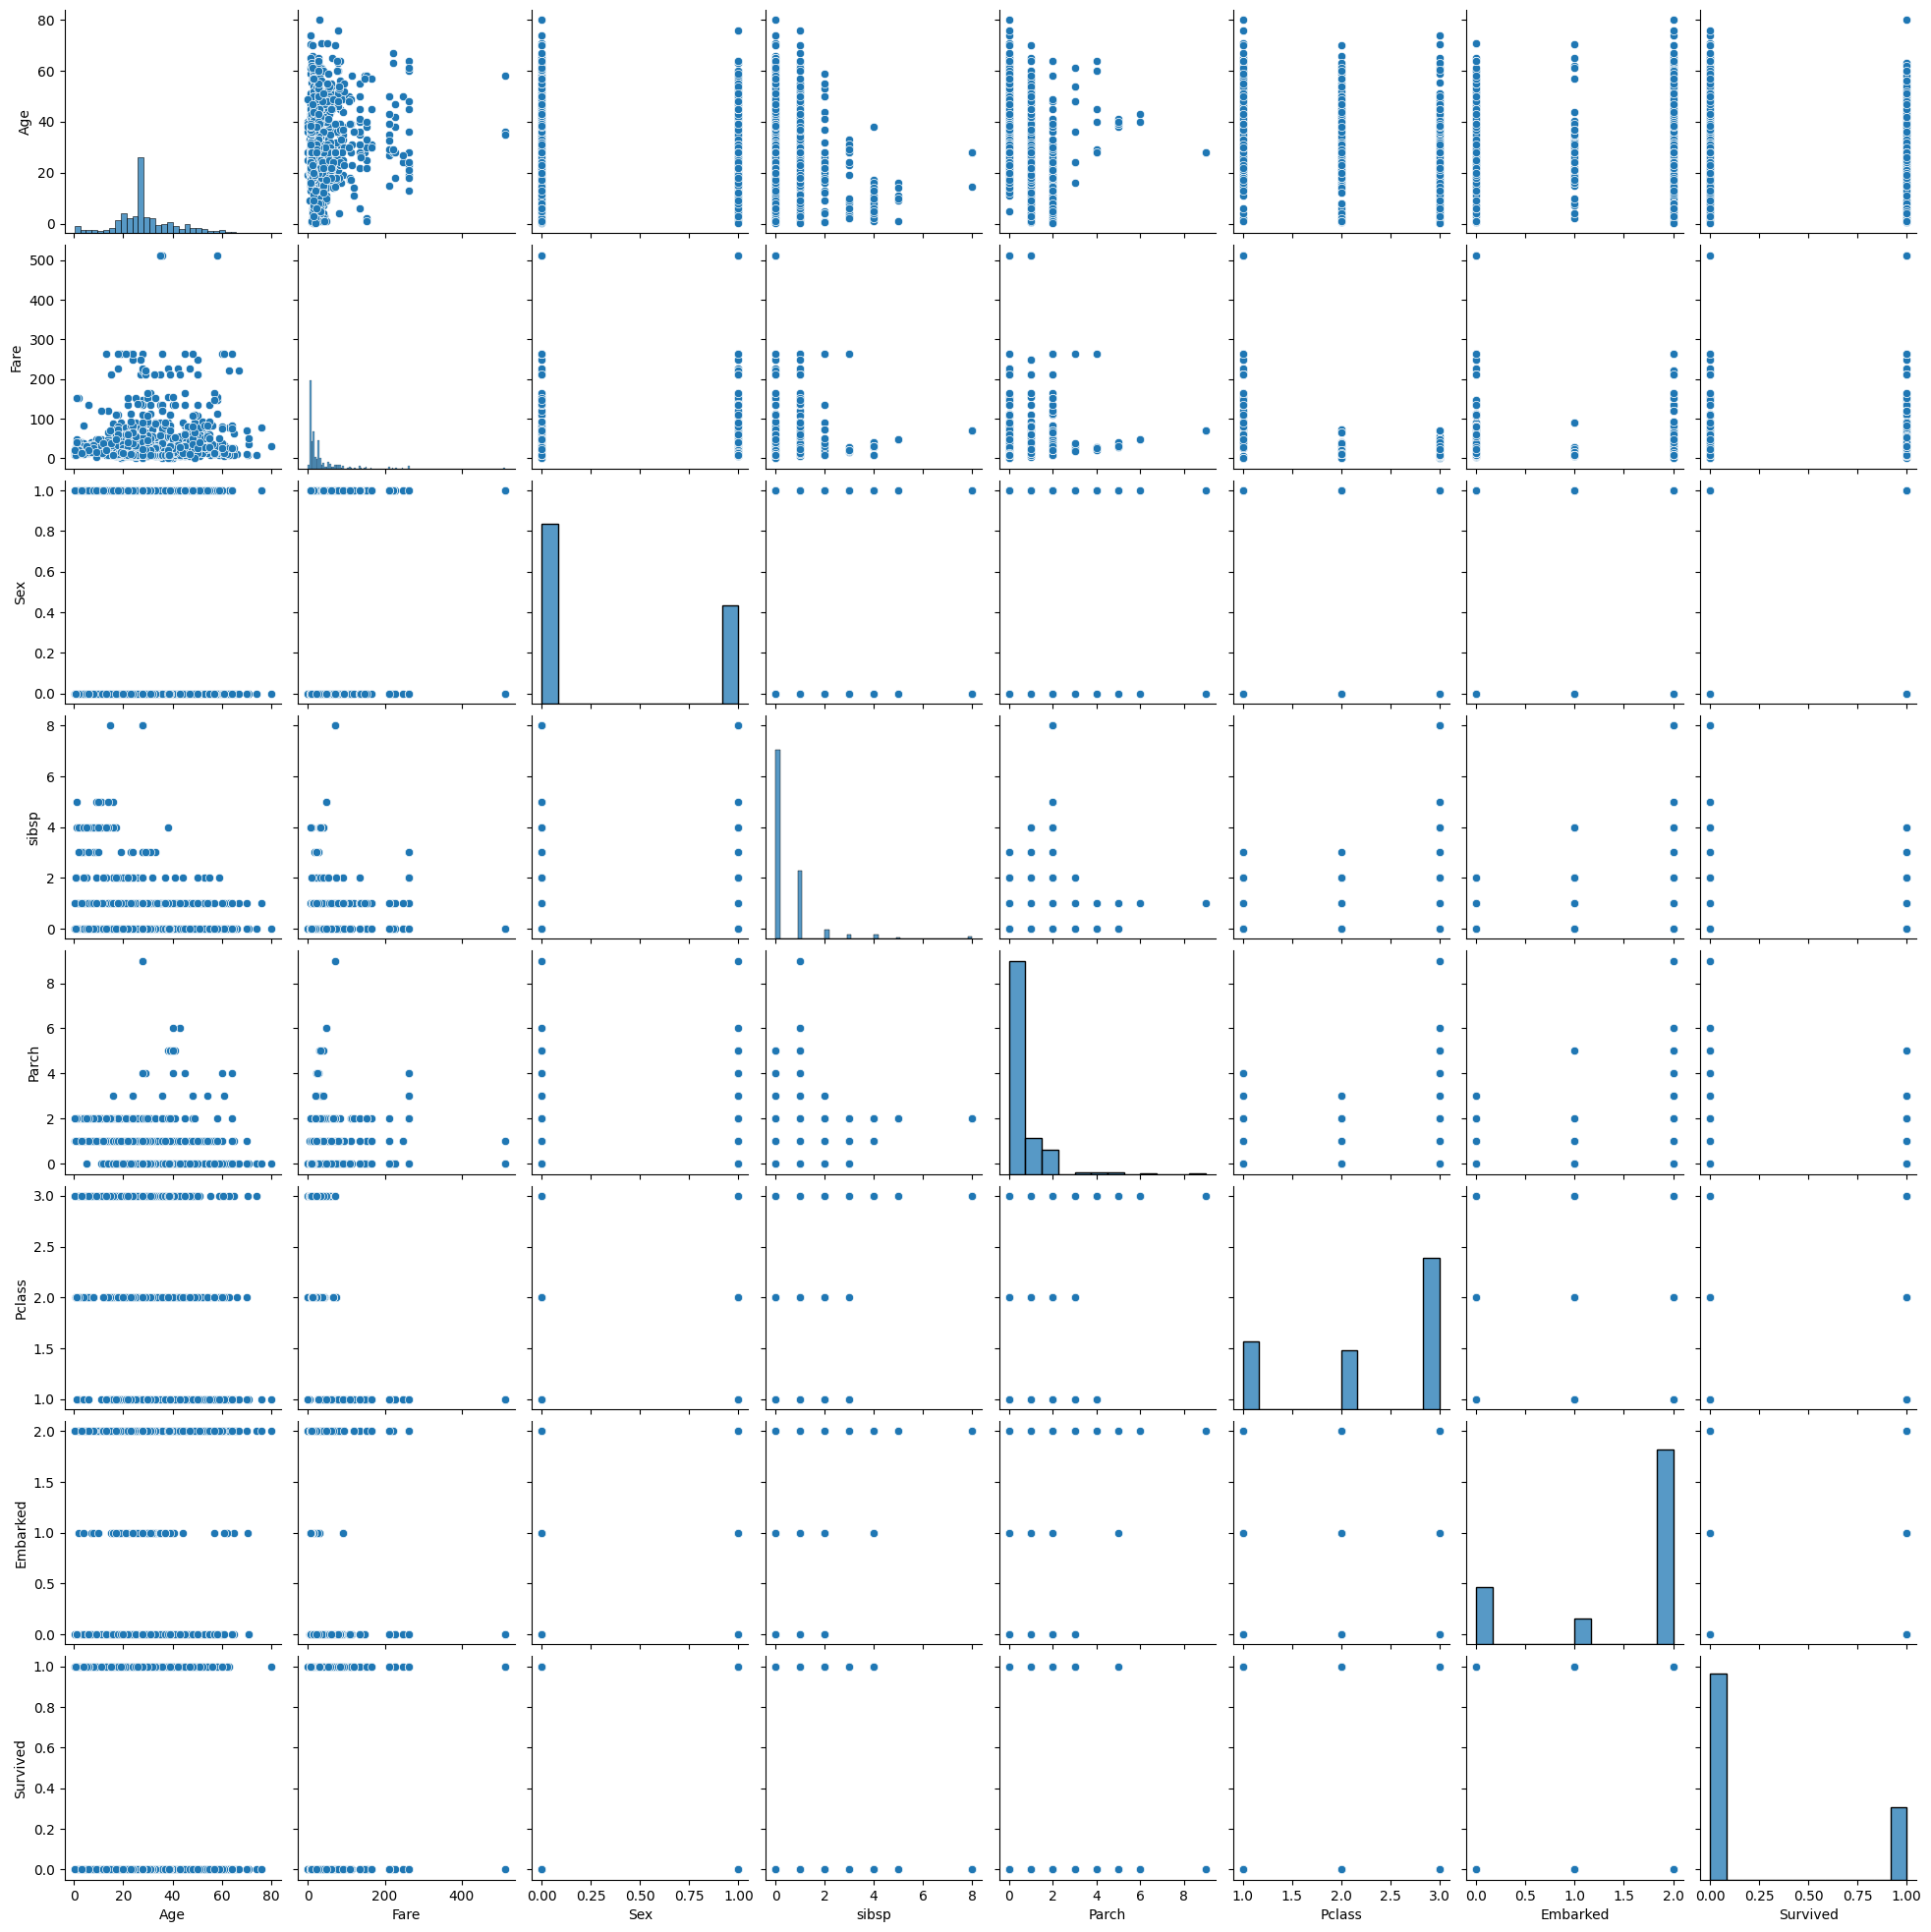

In [8]:
sns.pairplot(df)

All right. Now we want to see which parameters are actually correlated to the Survival. For that let's get the heat map.

<Axes: >

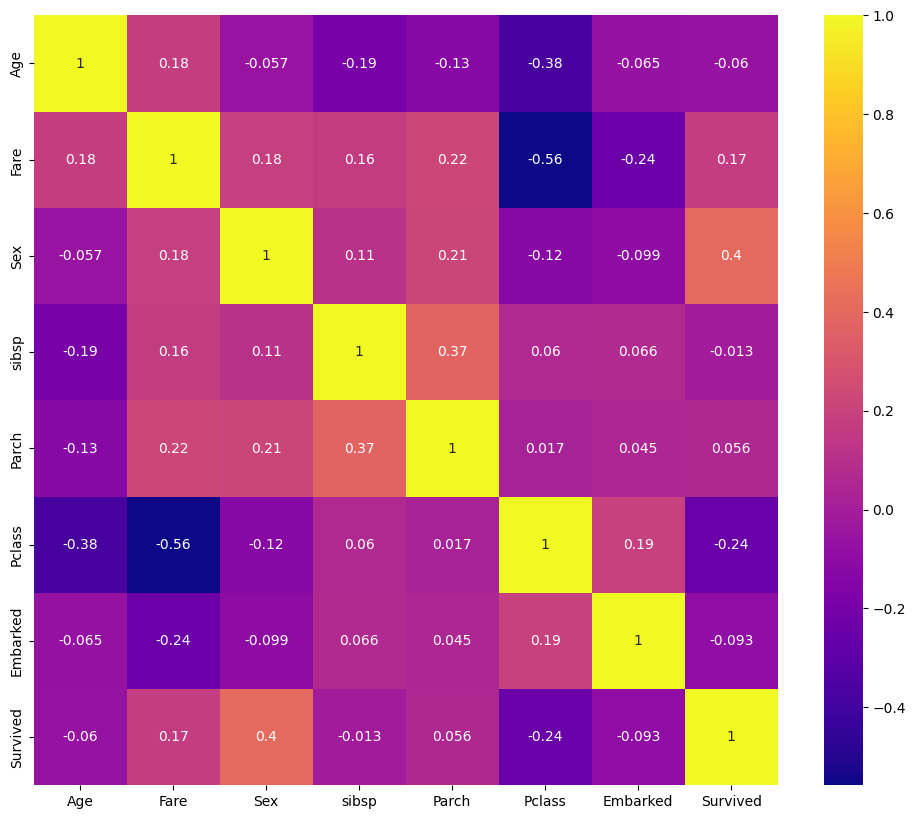

In [9]:
plt.figure(figsize=(12,10))
# we keep annot=True to make the values appear of df.corr() appear on the heatmap
sns.heatmap(df.corr(),annot=True,cmap=plt.cm.plasma)

Now from the heat map it seems that the only values which are correlated(>0.1) with the "Survived" are **Fare, Sex** and **Pclass**(taking the abs value). So let's only take those for the training.

In [10]:
df = df[["Fare", "Sex", "Pclass", "Survived"]]

In [11]:
X = df.drop(['Survived',], axis=1).values
y = df['Survived'].values

 Now that we have our parameters(X) and the predict variable(y) set, I'll write a manual code for train_test_split as I've already mentioned I'm not going to use any special libraries.

In [12]:
def train_test_split(X, y, random_state=123, test_size=0.20):
    """
    Splits the data into training and testing sets.

    Parameters:
        X (numpy.ndarray): Features array of shape (n_samples, n_features).
        y (numpy.ndarray): Target array of shape (n_samples,).
        random_state (int): Seed for the random number generator. Default is 42.
        test_size (float): Proportion of samples to include in the test set. Default is 0.2.

    Returns:
        Tuple[numpy.ndarray]: A tuple containing X_train, X_test, y_train, y_test.
    """
    # Get number of samples
    n_samples = X.shape[0]

    # Set the seed for the random number generator
    np.random.seed(random_state)

    # Shuffle the indices
    shuffled_indices = np.random.permutation(np.arange(n_samples))

    # Determine the size of the test set
    test_size = int(n_samples * test_size)

    # Split the indices into test and train
    test_indices = shuffled_indices[:test_size]
    train_indices = shuffled_indices[test_size:]

    # Split the features and target arrays into test and train
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

## Standardizing the Data

1. Calculate mean($\mu$) and standard deviation($\sigma$) for each feature in the dataset.
2. Now for each data point, subtract mean($\mu$) of the feature and divide by the standard deviation($\sigma$) of the feature.

Let the feature be denoted as $x$ then the formula for standardized value can be written as:
$$
\text{Standardized Value} = \frac{x - \mu}{\sigma}
$$

In [14]:
def standardize_data(X_train, X_test):
    """
    Standardizes the input data using mean and standard deviation.

    Parameters:
        X_train (numpy.ndarray): Training data.
        X_test (numpy.ndarray): Testing data.

    Returns:
        Tuple of standardized training and testing data.
    """
    # Calculate the mean and standard deviation using the training data
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)
    
    # Standardize the data
    X_train = (X_train - mean) / std
    X_test = (X_test - mean) / std
    
    return X_train, X_test

X_train, X_test = standardize_data(X_train, X_test)

# 4. Model Implementation

## Logistic Regression Model

Logistic regression is a widely used model in machine learning for binary classification tasks. It models the probability that a given input belongs to a particular class. The logistic regression model function is represented as:

$$ f_{\mathbf{w},b}(\mathbf{x}) = g(\mathbf{w} \cdot \mathbf{x} + b) $$

In this equation, $f_{\mathbf{w},b}(\mathbf{x})$ represents the predicted probability, $\mathbf{w}$ is the weight vector, $\mathbf{b}$ is the bias term, $\mathbf{x}$ is the input feature vector, and $g(z)$ is the sigmoid function:

$$ g(z) = \frac{1}{1 + e^{-z}} $$

## Model Training

To train a logistic regression model, we aim to find the best values for the parameters $(\mathbf{w}, b)$ that best fit our dataset and provide accurate class probabilities.

### Forward Pass

The forward pass computes the linear combination of input features $\mathbf{x}$ with the weight vector $\mathbf{w}$ and the bias term $b$ and then applies the sigmoid function to the result:

$$ Z = \mathbf{x} \cdot \mathbf{w} + b $$
$$ A = \sigma(Z) $$

### Cost Function

The cost function measures the error between the predicted probabilities and the true labels. In logistic regression, we use the binary cross-entropy loss function:

$$ J(\mathbf{w},b) = -\frac{1}{m} \sum_{i=0}^{m-1} \left[y_i \log\left(f_{\mathbf{w},b}(\mathbf{x}_i)\right) + (1 - y_i) \log\left(1 - f_{\mathbf{w},b}(\mathbf{x}_i)\right)\right] $$

Here, $m$ is the number of samples, $y_i$ is the true label of sample $i$, and $f_{\mathbf{w},b}(\mathbf{x}_i)$ is the predicted probability of sample $i$ belonging to the positive class.

### Backward Pass (Gradient Computation)

The backward pass calculates the gradients of the cost function with respect to the parameters $(\mathbf{w}, b)$. These gradients are essential for updating the model parameters during training:

$$ \frac{\partial J(\mathbf{w},b)}{\partial b} = \frac{1}{m} \sum_{i=0}^{m-1} \left(f_{\mathbf{w},b}(\mathbf{x}_i) - y_i\right) $$

$$ \frac{\partial J(\mathbf{w},b)}{\partial \mathbf{w}} = \frac{1}{m} \sum_{i=0}^{m-1} \left(f_{\mathbf{w},b}(\mathbf{x}_i) - y_i\right)\mathbf{x}_i $$

## Training Process

The training process involves iteratively updating the weight vector $\mathbf{w}$ and bias term $b$ to minimize the cost function. This is typically done through an optimization algorithm like gradient descent. The update equations for parameters are:

$$ \mathbf{w} \leftarrow \mathbf{w} - \alpha \frac{\partial J}{\partial \mathbf{w}} $$

$$ b \leftarrow b - \alpha \frac{\partial J}{\partial b} $$

Here, $\alpha$ represents the learning rate, which controls the step size during parameter updates.

By iteratively performing the forward pass, computing the cost, performing the backward pass, and updating the parameters, the logistic regression model learns to make better predictions and fit the data.


In [15]:
def sigmoid(z):
    """
    Compute the sigmoid function for a given input.

    The sigmoid function is a mathematical function used in logistic regression and neural networks
    to map any real-valued number to a value between 0 and 1.

    Parameters:
        z (float or numpy.ndarray): The input value(s) for which to compute the sigmoid.

    Returns:
        float or numpy.ndarray: The sigmoid of the input value(s).

    Example:
        >>> sigmoid(0)
        0.5
    """
    # Compute the sigmoid function using the formula: 1 / (1 + e^(-z)).
    sigmoid_result = 1 / (1 + np.exp(-z))
    
    # Return the computed sigmoid value.
    return sigmoid_result

In [16]:
class LogisticRegressionScratch:
    """
    Logistic Regression model.

    Parameters:
        learning_rate (float): Learning rate for the model.

    Methods:
        initialize_parameter(): Initializes the parameters of the model.
        sigmoid(z): Computes the sigmoid activation function for given input z.
        forward(X): Computes forward propagation for given input X.
        compute_cost(predictions): Computes the cost function for given predictions.
        compute_gradient(predictions): Computes the gradients for the model using given predictions.
        fit(X, y, iterations, plot_cost): Trains the model on given input X and labels y for specified iterations.
        predict(X): Predicts the labels for given input X.
    """

    def __init__(self, learning_rate=0.0001):
        np.random.seed(1)
        self.learning_rate = learning_rate

    def initialize_parameter(self):
        """
        Initializes the parameters of the model.
        """
        self.W = np.zeros(self.X.shape[1])
        self.b = 0.0


    def forward(self, X):
        """
        Computes forward propagation for given input X.

        Parameters:
            X (numpy.ndarray): Input array.

        Returns:
            numpy.ndarray: Output array.
        """
#         print(X.shape, self.W.shape)
        Z = np.matmul(X, self.W) + self.b
        A = sigmoid(Z)
        return A

    def compute_cost(self, predictions):
        """
        Computes the cost function for given predictions.

        Parameters:
            predictions (numpy.ndarray): Predictions of the model.

        Returns:
            float: Cost of the model.
        """
        m = self.X.shape[0]  # number of training examples
        # compute the cost
        cost = np.sum((-np.log(predictions + 1e-8) * self.y) + (-np.log(1 - predictions + 1e-8)) * (
                1 - self.y))  # we are adding small value epsilon to avoid log of 0
        cost = cost / m
        return cost

    def compute_gradient(self, predictions):
        """
        Computes the gradients for the model using given predictions.

        Parameters:
            predictions (numpy.ndarray): Predictions of the model.
        """
        # get training shape
        m = self.X.shape[0]

        # compute gradients
        self.dW = np.matmul(self.X.T, (predictions - self.y))
        self.dW = np.array([np.mean(grad) for grad in self.dW])

        self.db = np.sum(np.subtract(predictions, self.y))

        # scale gradients
        self.dW = self.dW * 1 / m
        self.db = self.db * 1 / m


    def fit(self, X, y, iterations, plot_cost=True):
        """
        Trains the model on given input X and labels y for specified iterations.

        Parameters:
            X (numpy.ndarray): Input features array of shape (n_samples, n )
            y (numpy.ndarray): Labels array of shape (n_samples, 1)
            iterations (int): Number of iterations for training.
            plot_cost (bool): Whether to plot cost over iterations or not.

        Returns:
            None.
        """
        self.X = X
        self.y = y

        self.initialize_parameter()

        costs = []
        for i in range(iterations):
            # forward propagation
            predictions = self.forward(self.X)

            # compute cost
            cost = self.compute_cost(predictions)
            costs.append(cost)

            # compute gradients
            self.compute_gradient(predictions)

            # update parameters
            self.W = self.W - self.learning_rate * self.dW
            self.b = self.b - self.learning_rate * self.db

            # print cost every 100 iterations
            if i % 10000 == 0:
                print("Cost after iteration {}: {}".format(i, cost))

        


    def predict(self, X):
        """
        Predicts the labels for given input X.

        Parameters:
            X (numpy.ndarray): Input features array.

        Returns:
            numpy.ndarray: Predicted labels.
        """
        predictions = self.forward(X)
        return np.round(predictions)
    
    
    def save_model(self, filename=None):
        """
        Save the trained model to a file using pickle.

        Parameters:
            filename (str): The name of the file to save the model to.
        """
        model_data = {
            'learning_rate': self.learning_rate,
            'W': self.W,
            'b': self.b
        }

        with open(filename, 'wb') as file:
            pickle.dump(model_data, file)

    @classmethod
    def load_model(cls, filename):
        """
        Load a trained model from a file using pickle.

        Parameters:
            filename (str): The name of the file to load the model from.

        Returns:
            LogisticRegression: An instance of the LogisticRegression class with loaded parameters.
        """
        with open(filename, 'rb') as file:
            model_data = pickle.load(file)

        # Create a new instance of the class and initialize it with the loaded parameters
        loaded_model = cls(model_data['learning_rate'])
        loaded_model.W = model_data['W']
        loaded_model.b = model_data['b']

        return loaded_model

In [17]:
lg = LogisticRegressionScratch()
lg.fit(X_train, y_train, 200000)

Cost after iteration 0: 0.6931471605599453
Cost after iteration 10000: 0.6115786306527117
Cost after iteration 20000: 0.5641795508111921
Cost after iteration 30000: 0.5350918156580516
Cost after iteration 40000: 0.5163051404813458
Cost after iteration 50000: 0.5036422627979695
Cost after iteration 60000: 0.4948064225061946
Cost after iteration 70000: 0.4884654267866894
Cost after iteration 80000: 0.4838087262230252
Cost after iteration 90000: 0.4803225606914779
Cost after iteration 100000: 0.47766984957973513
Cost after iteration 110000: 0.4756228993214911
Cost after iteration 120000: 0.4740240568525821
Cost after iteration 130000: 0.47276182515185466
Cost after iteration 140000: 0.4717558852975082
Cost after iteration 150000: 0.4709474353208616
Cost after iteration 160000: 0.4702928040564256
Cost after iteration 170000: 0.46975913845780914
Cost after iteration 180000: 0.46932143566192736
Cost after iteration 190000: 0.46896046589652707


In [18]:
lg.save_model("model.pkl")

# 5. Model Evaluation 


**In classification tasks, it's crucial to evaluate the performance of your model. There are several metrics that can help you understand how well your model is performing. Here are four commonly used classification metrics:**
## 1. Accuracy

**Formula:**
$$
\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}}
$$
- **Accuracy** measures the proportion of correctly predicted instances out of all instances in a classification model.
- It is a widely used metric for evaluating classification performance.
- A higher accuracy value indicates a better classification model.
- However, accuracy alone may not provide a complete picture, especially in imbalanced datasets.

## 2. Precision

**Formula:**
$$
\text{Precision} = \frac{\text{True Positives}}{\text{True Positives + False Positives}}
$$

- **Precision** measures the proportion of true positive predictions out of all positive predictions made by the model.
- It is a useful metric when the cost of false positives is high.
- Higher precision means the model makes fewer false positive predictions.

## 3. Recall (Sensitivity)

**Formula:**
$$
\text{Recall (Sensitivity)} = \frac{\text{True Positives}}{\text{True Positives + False Negatives}}
$$

- **Recall**, also known as sensitivity or true positive rate, measures the proportion of true positive predictions out of all actual positive instances in the dataset.
- It is a valuable metric when it's essential to capture all positive instances.
- Higher recall means the model captures more of the actual positive instances.

## 4. F1-Score

**Formula:**
$$
\text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision + Recall}}
$$

- The **F1-Score** is the harmonic mean of precision and recall.
- It provides a balance between precision and recall, making it a suitable metric when there is a trade-off between false positives and false negatives.
- A higher F1-Score indicates a model that achieves a balance between precision and recall.



In [19]:
class ClassificationMetrics:
    @staticmethod
    def accuracy(y_true, y_pred):
        """
        Computes the accuracy of a classification model.

        Parameters:
        y_true (numpy array): A numpy array of true labels for each data point.
        y_pred (numpy array): A numpy array of predicted labels for each data point.

        Returns:
        float: The accuracy of the model, expressed as a percentage.
        """
        y_true = y_true.flatten()
        total_samples = len(y_true)
        correct_predictions = np.sum(y_true == y_pred)
        return (correct_predictions / total_samples)

    @staticmethod
    def precision(y_true, y_pred):
        """
        Computes the precision of a classification model.

        Parameters:
        y_true (numpy array): A numpy array of true labels for each data point.
        y_pred (numpy array): A numpy array of predicted labels for each data point.

        Returns:
        float: The precision of the model, which measures the proportion of true positive predictions
        out of all positive predictions made by the model.
        """
        true_positives = np.sum((y_true == 1) & (y_pred == 1))
        false_positives = np.sum((y_true == 0) & (y_pred == 1))
        return true_positives / (true_positives + false_positives)

    @staticmethod
    def recall(y_true, y_pred):
        """
        Computes the recall (sensitivity) of a classification model.

        Parameters:
        y_true (numpy array): A numpy array of true labels for each data point.
        y_pred (numpy array): A numpy array of predicted labels for each data point.

        Returns:
        float: The recall of the model, which measures the proportion of true positive predictions
        out of all actual positive instances in the dataset.
        """
        true_positives = np.sum((y_true == 1) & (y_pred == 1))
        false_negatives = np.sum((y_true == 1) & (y_pred == 0))
        return true_positives / (true_positives + false_negatives)

    @staticmethod
    def f1_score(y_true, y_pred):
        """
        Computes the F1-score of a classification model.

        Parameters:
        y_true (numpy array): A numpy array of true labels for each data point.
        y_pred (numpy array): A numpy array of predicted labels for each data point.

        Returns:
        float: The F1-score of the model, which is the harmonic mean of precision and recall.
        """
        precision_value = ClassificationMetrics.precision(y_true, y_pred)
        recall_value = ClassificationMetrics.recall(y_true, y_pred)
        return 2 * (precision_value * recall_value) / (precision_value + recall_value)

In [20]:
model = LogisticRegressionScratch.load_model("model.pkl")

In [21]:
y_pred = model.predict(X_test)
accuracy = ClassificationMetrics.accuracy(y_test, y_pred)
precision = ClassificationMetrics.precision(y_test, y_pred)
recall = ClassificationMetrics.recall(y_test, y_pred)
f1_score = ClassificationMetrics.f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2%}")
print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1-Score: {f1_score:.2%}")


Accuracy: 77.39%
Precision: 62.00%
Recall: 43.66%
F1-Score: 51.24%


As you can see the model gives the accuracy of 77% which is quite average. I've defined the whole logistic model myself which is a little different from the sklearn's or other libs LogisticRegression model. Even if this model gives somewhat good accuracy it still lacks some important features which can improve the accuracy. For example, my model lacks regularization and it also lacks some sophisticated optimization techniques to efficiently compute the gradient and update the parameters accordingly. Even if that's the case, it does gives some insights as to what exactly goes inside the Logistic Regression models and this custom model might work well for smaller datasets.